### Student Information
Name: 廖品亭

Student ID:109070022

GitHub ID: kthrn070022

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# >>> **PART 1** 

In [4]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [5]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [6]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [7]:
# add category to the dataframe
X['category'] = twenty_train.target

In [8]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

###  >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [9]:
#Filtering Rows Based on a Condition:
X[X['category_name'] == 'sci.med']


,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [10]:
#sorting data
X.sort_values(by='category')

,text,category,category_name
745,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1504,Subject: Re: Death Penalty (was Re: Political ...,0,alt.atheism
1621,From: nancyo@shnext15.ucslabs.sfu.ca (Nancy Pa...,0,alt.atheism
365,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
1798,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1697,From: dohertyl@dcs.gla.ac.uk (dohertyl) Subjec...,3,soc.religion.christian
755,From: mike@nx39.mik.uky.edu (Mike Mattone) Sub...,3,soc.religion.christian
753,"From: af664@yfn.ysu.edu (Frank DeCenso, Jr.) S...",3,soc.religion.christian
1685,From: noye@midway.uchicago.edu (vera shanti no...,3,soc.religion.christian


In [11]:
#grouping and aggregating data
X.groupby('category_name').size()

category_name
alt.atheism               480
comp.graphics             584
sci.med                   594
soc.religion.christian    599
dtype: int64

In [12]:
#Crosstabulation
pd.crosstab(X['category_name'], X['category'])

category,0,1,2,3
category_name,,,,
alt.atheism,480,0,0,0
comp.graphics,0,584,0,0
sci.med,0,0,594,0
soc.religion.christian,0,0,0,599


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [13]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [14]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [15]:
#Answer
print("Observations:\nRows 0 and 1: \nThese have missing values represented as np.nan and 'NaN' (as a string), so they are correctly identified as missing values (True).\nRows 2, 3, 4, and 5: \nThese have values that are not recognized as missing values by default. Row 2 has the string 'NaN', row 3 has the string 'None', row 4 has the Python None object, and row 5 has an empty string (''). These values are not considered missing, so they are marked as False.")
print("\nWhy it happened: \nThe reason .isnull() didn't work as expected is that it has a specific behavior for recognizing missing values (primarily np.nan and Python's None object).\nWhen dealing with datasets that contain various representations of missing values like 'NaN' or 'None' (as strings), you may need to perform additional data preprocessing or use custom logic to correctly identify and handle missing values based on the specific dataset's conventions.")

Observations:
Rows 0 and 1: 
These have missing values represented as np.nan and 'NaN' (as a string), so they are correctly identified as missing values (True).
Rows 2, 3, 4, and 5: 
These have values that are not recognized as missing values by default. Row 2 has the string 'NaN', row 3 has the string 'None', row 4 has the Python None object, and row 5 has an empty string (''). These values are not considered missing, so they are marked as False.

Why it happened: 
The reason .isnull() didn't work as expected is that it has a specific behavior for recognizing missing values (primarily np.nan and Python's None object).
When dealing with datasets that contain various representations of missing values like 'NaN' or 'None' (as strings), you may need to perform additional data preprocessing or use custom logic to correctly identify and handle missing values based on the specific dataset's conventions.


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [16]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


In [17]:
X_sample[0:4]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian


In [18]:
X.groupby('category_name').size()

category_name
alt.atheism               480
comp.graphics             584
sci.med                   594
soc.religion.christian    599
dtype: int64

In [19]:
X_sample.groupby('category_name').size()

category_name
alt.atheism               206
comp.graphics             247
sci.med                   277
soc.religion.christian    270
dtype: int64

In [20]:
#changes between X and X_sample
#1.number of rows
print(X.shape) 
print(X_sample.shape)

(2257, 3)
(1000, 3)


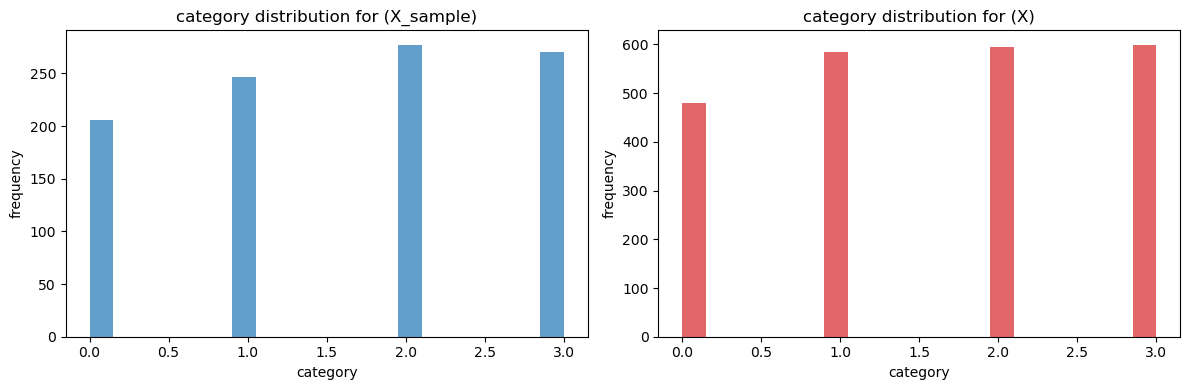

In [21]:
#2.data distribution
import matplotlib.pyplot as plt

column_name = 'category'
data_sample = X_sample[column_name]
data_original = X[column_name]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# category distribution for X_sample 
axes[0].hist(data_sample, bins=20, color='tab:blue', alpha=0.7)
axes[0].set_title(f'{column_name} distribution for (X_sample)')
axes[0].set_xlabel(column_name)
axes[0].set_ylabel('frequency')

# category distribution for X
axes[1].hist(data_original, bins=20, color='tab:red', alpha=0.7)
axes[1].set_title(f'{column_name} distribution for (X)')
axes[1].set_xlabel(column_name)
axes[1].set_ylabel('frequency')

plt.tight_layout()
plt.show()


In [22]:
#3.average length of text
text_column_name = 'text'

# count average text length for X
X['text_length'] = X[text_column_name].apply(lambda x: len(str(x)))
average_text_length_X = X['text_length'].mean()

# count average text length for X_sample
X_sample['text_length'] = X_sample[text_column_name].apply(lambda x: len(str(x)))
average_text_length_X_sample = X_sample['text_length'].mean()

# Print the average text lengths for both datasets
print(f"Average text length of {text_column_name} column (X): {average_text_length_X:.2f} characters")
print(f"Average text length of {text_column_name} column (X_sample): {average_text_length_X_sample:.2f} characters")


Average text length of text column (X): 1992.96 characters
Average text length of text column (X_sample): 1971.42 characters


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

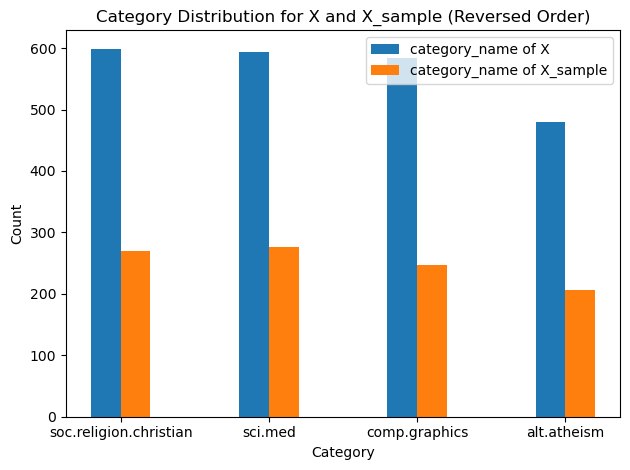

In [23]:
# Get the value counts for X_sample and X
counts_X_sample = X_sample.category_name.value_counts()
counts_X = X.category_name.value_counts()

# Find the unique categories from both datasets
unique_categories = sorted(set(counts_X_sample.index) | set(counts_X.index))

# Reverse the order of unique_categories
unique_categories.reverse()

category_index = range(len(unique_categories))
bar_width = 0.2
X_positions = np.arange(len(unique_categories))
X_sample_positions = X_positions + bar_width

plt.bar(X_positions, counts_X.reindex(unique_categories, fill_value=0),
        width=bar_width, label='category_name of X', color='tab:blue')

plt.bar(X_sample_positions, counts_X_sample.reindex(unique_categories, fill_value=0), 
        width=bar_width, label='category_name of X_sample', color='tab:orange')

# Set the x-axis ticks and labels with smaller font size, and rotate them to horizontal
plt.xticks([i + bar_width/2 for i in category_index], unique_categories, rotation=0, fontsize=10)

plt.legend()
plt.title('Category Distribution for X and X_sample (Reversed Order)')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [25]:
# Answer here
for i in X_counts[4:5, 0:100].toarray().nonzero():
    print(count_vect.get_feature_names_out()[i[1]])

00
01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

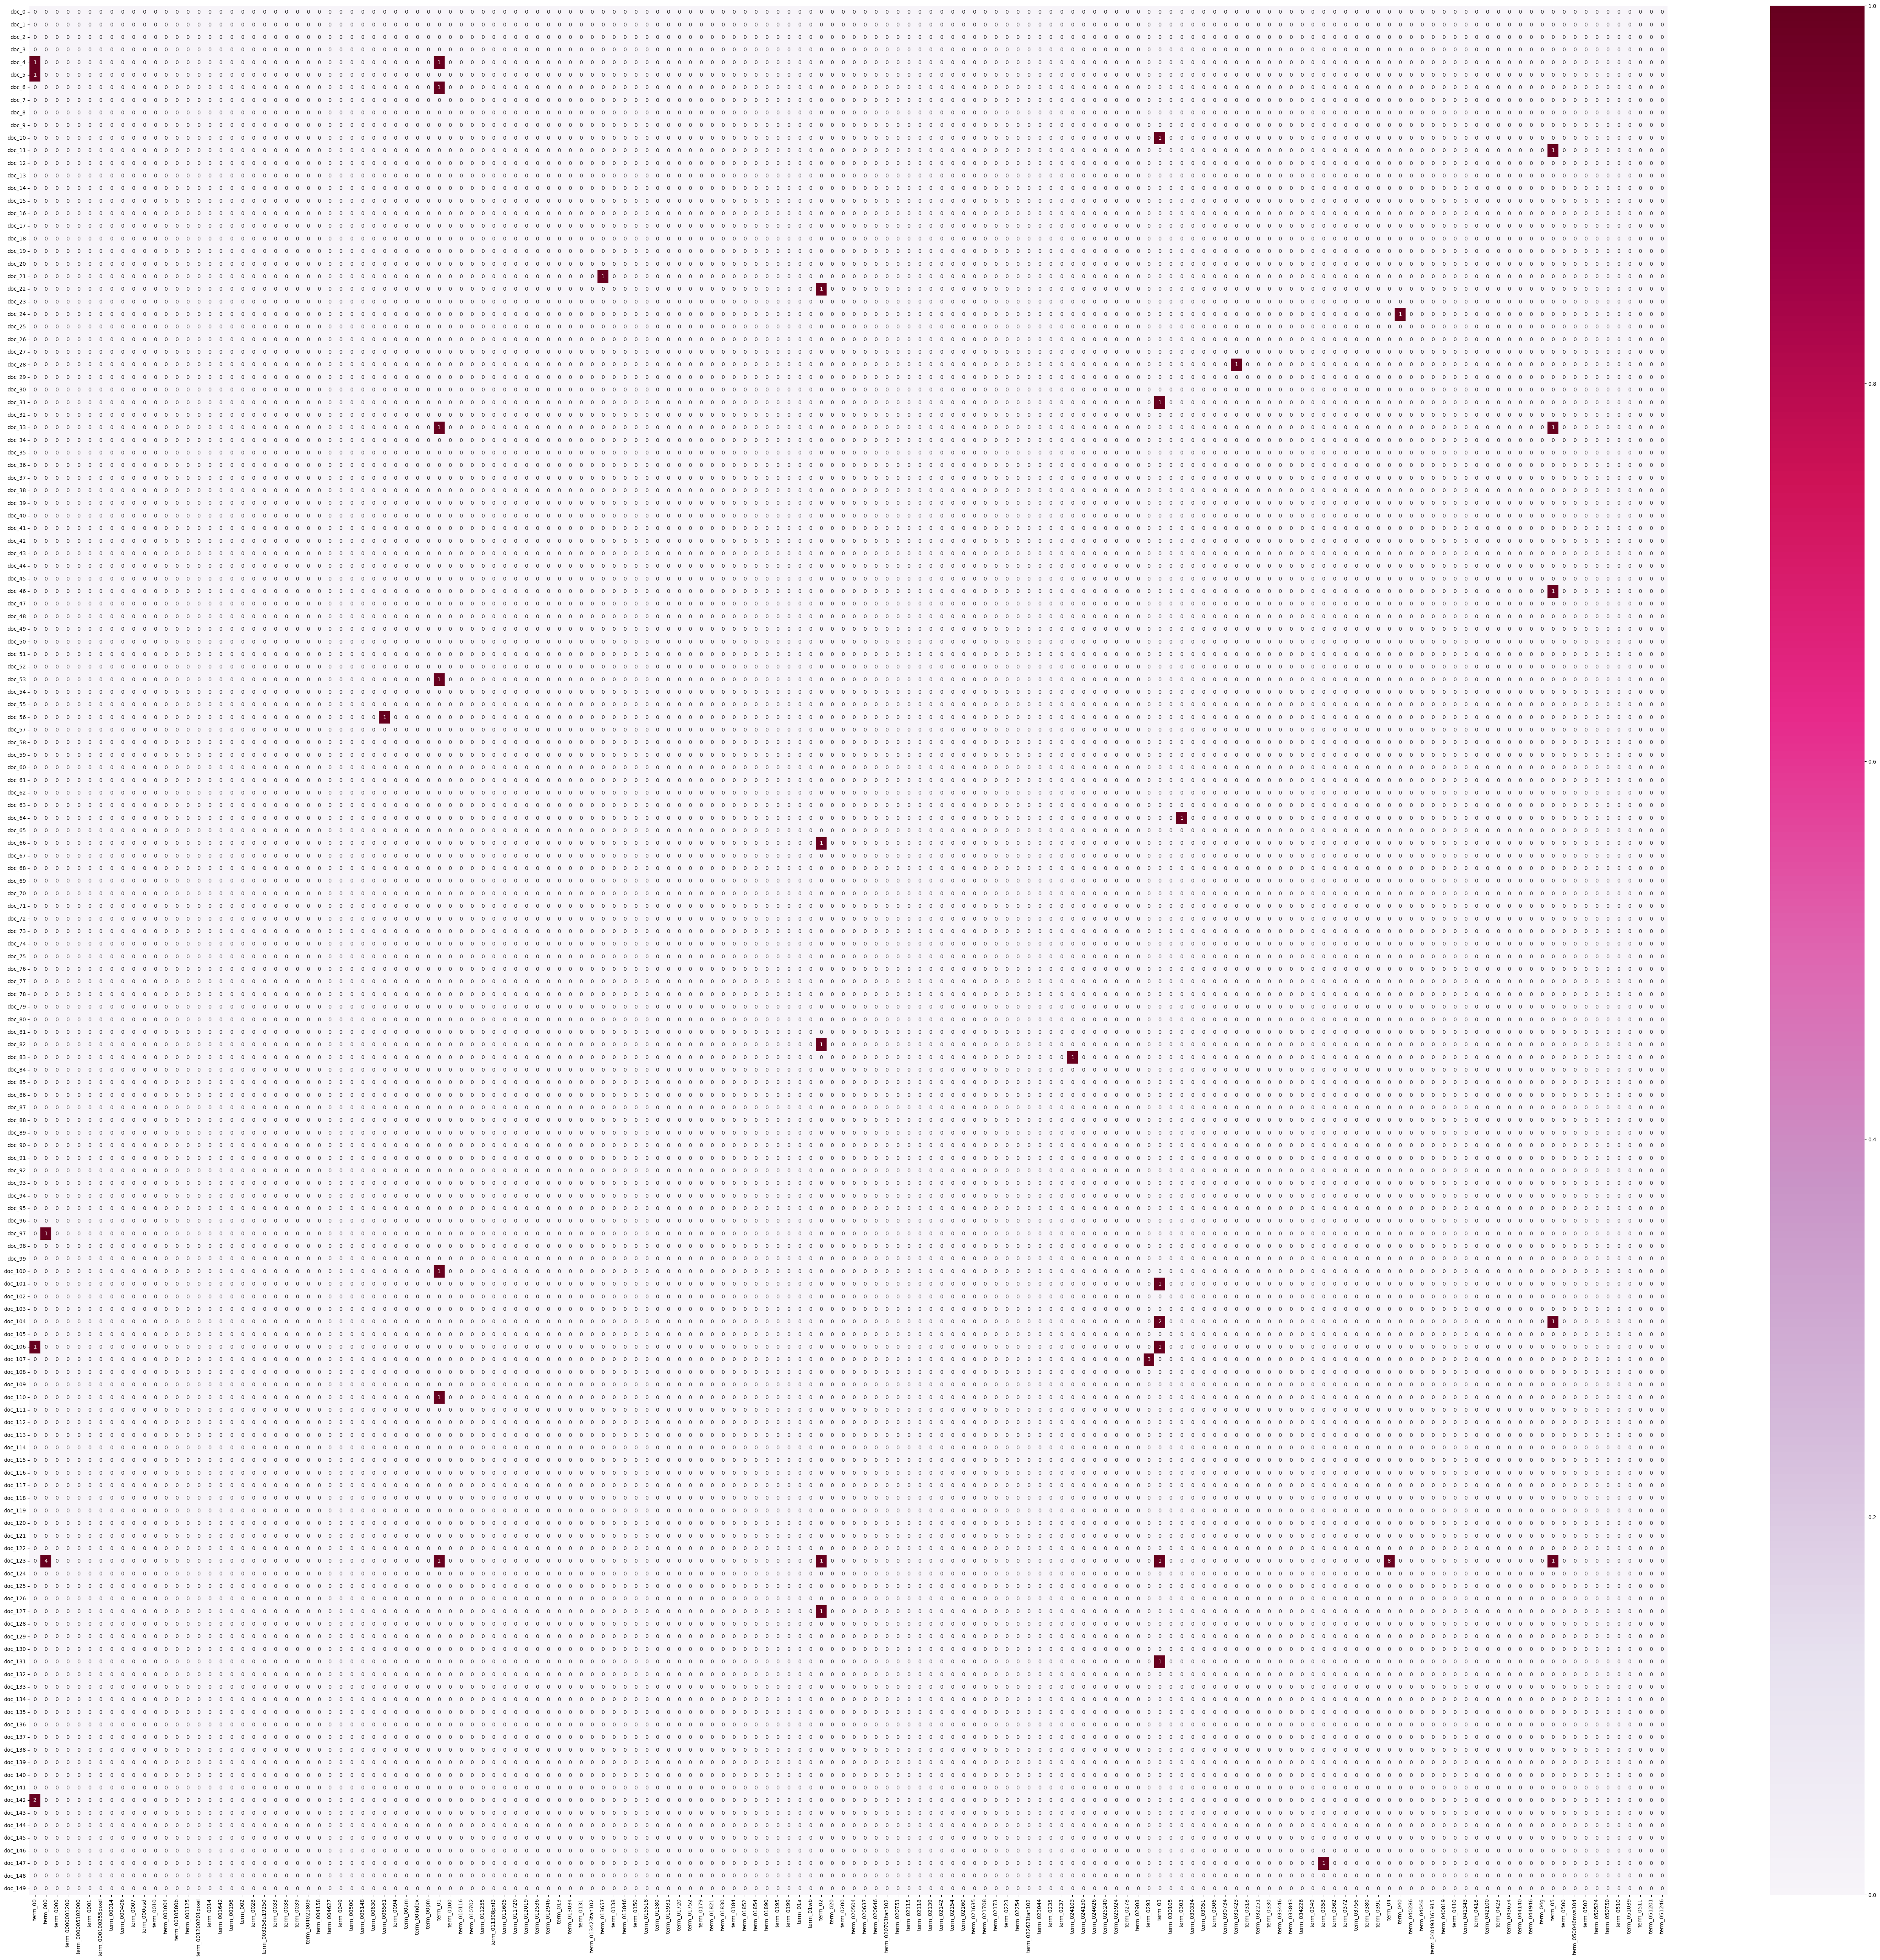

In [26]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:150]] 
plot_y = ["doc_"+ str(i) for i in list(X.index)[:150]]
plot_z = X_counts[:150, :150].toarray()
plot_z = plot_z.astype(np.float32)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)  
plt.subplots(figsize=(70, 65))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1,annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [27]:
from sklearn.decomposition import PCA

In [28]:
print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 3)


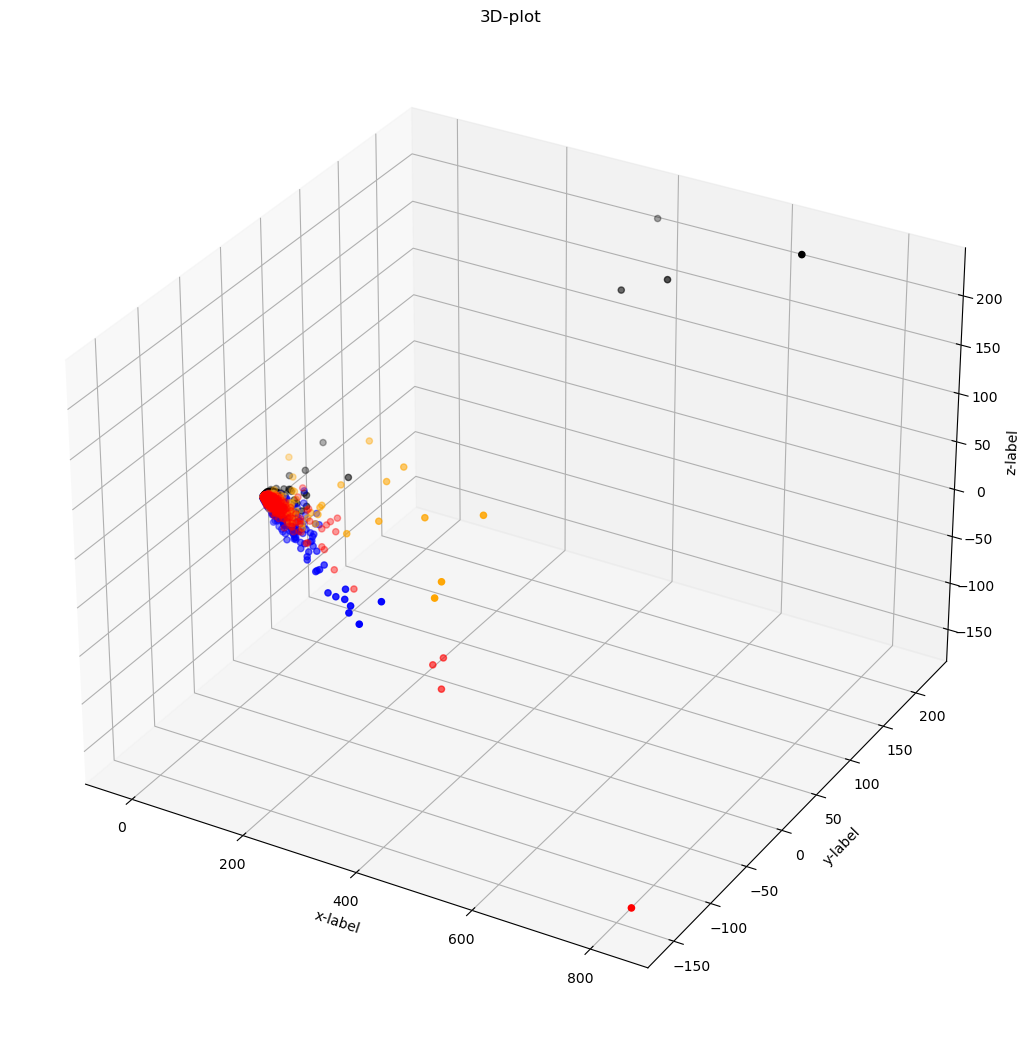

In [29]:
import numpy as np
import matplotlib.pyplot as plt

col = ['red', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (20, 13))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    x = X_reduced[X['category_name'] == category].T[0]
    y = X_reduced[X['category_name'] == category].T[1]
    z = X_reduced[X['category_name'] == category].T[1]
    ax.scatter(x, y, z, c = c, marker='o')

ax.set_xlabel('x-label')
ax.set_ylabel('y-label')
ax.set_zlabel('z-label')
# ax.plot(x, y, z)
plt.title('3D-plot')
plt.show()

# >>> **PART 2** 

## 2. Data Preperation

In [31]:
# obtain the documents
import os
file_path_se = "sentiment labelled sentences"


sentiment_data = {'website' :[], 'review' :[], 'label' :[]}

for filename in os.listdir(file_path_se):
    if filename.endswith(".txt"):
        file_path = os.path.join(file_path_se, filename)
        website = filename.split('_')[0]

        with open(file_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                part = line[:-1].split('\t')
                
                # Check if the line has at least two elements (review and non-empty label)
                if len(part) >= 2 and part[1].strip():  # Check if the label is not empty
                    sentiment_data['website'].append(website)
                    sentiment_data['review'].append(part[0])
                    sentiment_data['label'].append(int(part[1]))


Let's take at look some of the records that are contained in our subset of the data

In [32]:
len(sentiment_data['website'])

3000

In [33]:
len(sentiment_data['label'])

3000

In [34]:
# label of first 10 documents.
sentiment_data['label'][0:10]

[0, 1, 1, 0, 1, 0, 0, 1, 0, 0]

In [35]:
for i in sentiment_data['label'][:10]:
    print(sentiment_data['label'][i])

0
1
1
0
1
0
0
1
0
0


### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [36]:
for i in sentiment_data['review'][0:3]:
    print(i)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [37]:
import pandas as pd

sentiment_sentence_df = pd.DataFrame(sentiment_data)

In [38]:
len(sentiment_sentence_df)

3000

In [39]:
sentiment_sentence_df[0:2]

,website,review,label
0,amazon,So there is no way for me to plug it in here i...,0
1,amazon,"Good case, Excellent value.",1


In [40]:
for i in sentiment_sentence_df["review"][:3]:
    print(i)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


##### Adding Columns

In [41]:
def label_category(label):
    if label == 1:
        return 'positive'
    elif label == 0:
        return 'negative'

In [42]:
#add label categories
sentiment_sentence_df['label_category'] = sentiment_sentence_df.label.apply(label_category)

In [43]:
sentiment_sentence_df.head()

,website,review,label,label_category
0,amazon,So there is no way for me to plug it in here i...,0,negative
1,amazon,"Good case, Excellent value.",1,positive
2,amazon,Great for the jawbone.,1,positive
3,amazon,Tied to charger for conversations lasting more...,0,negative
4,amazon,The mic is great.,1,positive


### 3.2 Familiarizing yourself with the Data

In [44]:
# a simple query
sentiment_sentence_df[:10][["review","label_category"]]

,review,label_category
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative
7,If you are Razr owner...you must have this!,positive
8,"Needless to say, I wasted my money.",negative
9,What a waste of money and time!.,negative


In [45]:
sentiment_sentence_df[-10:]

,website,review,label,label_category
2990,imdb,"The opening sequence of this gem is a classic,...",1,positive
2991,imdb,Fans of the genre will be in heaven.,1,positive
2992,imdb,Lange had become a great actress.,1,positive
2993,imdb,It looked like a wonderful story.,1,positive
2994,imdb,I never walked out of a movie faster.,0,negative
2995,imdb,I just got bored watching Jessice Lange take h...,0,negative
2996,imdb,"Unfortunately, any virtue in this film's produ...",0,negative
2997,imdb,"In a word, it is embarrassing.",0,negative
2998,imdb,Exceptionally bad!,0,negative
2999,imdb,All in all its an insult to one's intelligence...,0,negative


In [46]:
sentiment_sentence_df.loc[:10, 'review']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: review, dtype: object

In [47]:
sentiment_sentence_df.iloc[:10, 1]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: review, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [48]:
#Filtering Rows Based on a Condition:
sentiment_sentence_df[sentiment_sentence_df['label_category']=='positive']

,website,review,label,label_category
1,amazon,"Good case, Excellent value.",1,positive
2,amazon,Great for the jawbone.,1,positive
4,amazon,The mic is great.,1,positive
7,amazon,If you are Razr owner...you must have this!,1,positive
10,amazon,And the sound quality is great.,1,positive
...,...,...,...,...
2989,imdb,":) Anyway, the plot flowed smoothly and the ma...",1,positive
2990,imdb,"The opening sequence of this gem is a classic,...",1,positive
2991,imdb,Fans of the genre will be in heaven.,1,positive
2992,imdb,Lange had become a great actress.,1,positive


In [49]:
#grouping and aggregating data
sentiment_sentence_df.groupby('label_category').size()

label_category
negative    1500
positive    1500
dtype: int64

In [50]:
#Crosstabulation
pd.crosstab(sentiment_sentence_df['label_category'], sentiment_sentence_df['label'])

label,0,1
label_category,,
negative,1500,0
positive,0,1500


### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```positive``` category, and query every 10th record. Only show the first 5 records.

In [51]:
sentiment_sentence_df[sentiment_sentence_df['label_category']=='positive'][::10][:5]

,website,review,label,label_category
1,amazon,"Good case, Excellent value.",1,positive
21,amazon,I bought this to use with my Kindle Fire and a...,1,positive
44,amazon,Excellent bluetooth headset.,1,positive
61,amazon,I really recommend this faceplates since it lo...,1,positive
78,amazon,"I love this phone , It is very handy and has a...",1,positive


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [52]:
# check missing values
sentiment_sentence_df.isnull()

,website,review,label,label_category
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [53]:
#check missing values
sentiment_sentence_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,website,review,label,label_category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [54]:
sentiment_sentence_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [55]:
#add dummy_series
dummy_series = pd.Series(["dummy_record",1], index = ["review", "label"])

In [56]:
dummy_series

review    dummy_record
label                1
dtype: object

In [57]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,review,label
0,dummy_record,1


In [58]:
result_with_series = pd.concat([sentiment_sentence_df, dummy_series.to_frame().T], ignore_index=True)

In [59]:
# check if the records was commited into result
len(result_with_series)

3001

In [60]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,website,review,label,label_category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,0,0,1


In [61]:
# dummy record as dictionary format
dummy_dict = [{'review': 'dummy_record',
               'label': 1
              }]

In [62]:
sentiment_sentence_df = pd.concat([sentiment_sentence_df, pd.DataFrame(dummy_dict)], ignore_index=True)

In [63]:
len(sentiment_sentence_df)

3001

In [64]:
#we can see that our data now have missing value
sentiment_sentence_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,website,review,label,label_category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,0,0,1


In [65]:
#drop the missing value
sentiment_sentence_df.dropna(inplace = True)

In [66]:
#check if there are missing value
sentiment_sentence_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,website,review,label,label_category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [67]:
len(sentiment_sentence_df)

3000

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [68]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [69]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [70]:
#Answer
print("Observations:\nRows 0 and 1: \nThese have missing values represented as np.nan and 'NaN' (as a string), so they are correctly identified as missing values (True).\nRows 2, 3, 4, and 5: \nThese have values that are not recognized as missing values by default. Row 2 has the string 'NaN', row 3 has the string 'None', row 4 has the Python None object, and row 5 has an empty string (''). These values are not considered missing, so they are marked as False.")
print("\nWhy it happened: \nThe reason .isnull() didn't work as expected is that it has a specific behavior for recognizing missing values (primarily np.nan and Python's None object).\nWhen dealing with datasets that contain various representations of missing values like 'NaN' or 'None' (as strings), you may need to perform additional data preprocessing or use custom logic to correctly identify and handle missing values based on the specific dataset's conventions.")

Observations:
Rows 0 and 1: 
These have missing values represented as np.nan and 'NaN' (as a string), so they are correctly identified as missing values (True).
Rows 2, 3, 4, and 5: 
These have values that are not recognized as missing values by default. Row 2 has the string 'NaN', row 3 has the string 'None', row 4 has the Python None object, and row 5 has an empty string (''). These values are not considered missing, so they are marked as False.

Why it happened: 
The reason .isnull() didn't work as expected is that it has a specific behavior for recognizing missing values (primarily np.nan and Python's None object).
When dealing with datasets that contain various representations of missing values like 'NaN' or 'None' (as strings), you may need to perform additional data preprocessing or use custom logic to correctly identify and handle missing values based on the specific dataset's conventions.


### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

In [71]:
sentiment_sentence_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [72]:
#check how many duplicated data
sum(sentiment_sentence_df.duplicated())

17

In [73]:
sum(sentiment_sentence_df.duplicated('review'))

17

In [74]:
#deal with duplicated data
sentiment_sentence_df.drop_duplicates(keep=False, inplace=True)

In [75]:
len(sentiment_sentence_df)

2966

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [76]:
print(sentiment_sentence_df.shape)
ssf_sample = sentiment_sentence_df.sample(n = 1000, random_state = 42)
display(ssf_sample)

(2966, 4)


,website,review,label,label_category
2426,imdb,"I wish I could enter negative values, admins?",0,negative
812,amazon,Battery charge-life is quite long.,1,positive
1922,yelp,"Every time I eat here, I see caring teamwork t...",1,positive
339,amazon,It is practically useless and did not add any ...,0,negative
2051,imdb,In addition to having one of the most lovely s...,1,positive
...,...,...,...,...
2469,imdb,A cheap and cheerless heist movie with poor ch...,0,negative
283,amazon,I am very impressed with this headset from Pla...,1,positive
1699,yelp,"Anyways, The food was definitely not filling a...",0,negative
1675,yelp,A fantastic neighborhood gem !!!,1,positive


In [77]:
len(ssf_sample)

1000

In [78]:
ssf_sample[0:4]

,website,review,label,label_category
2426,imdb,"I wish I could enter negative values, admins?",0,negative
812,amazon,Battery charge-life is quite long.,1,positive
1922,yelp,"Every time I eat here, I see caring teamwork t...",1,positive
339,amazon,It is practically useless and did not add any ...,0,negative


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [79]:
#changes between X and X_sample
#1.number of rows
print(X.shape) 
print(X_sample.shape)

(2257, 4)
(1000, 4)


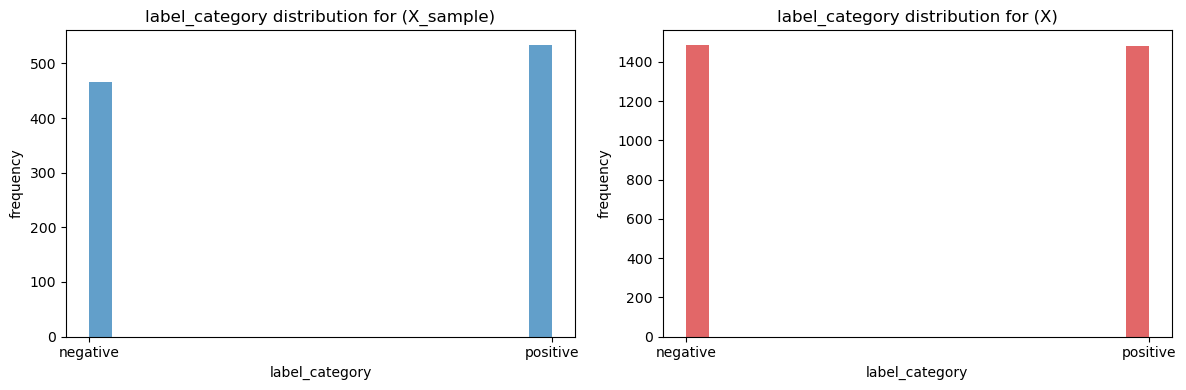

In [80]:
#2.data distribution
import matplotlib.pyplot as plt

column_name = 'label_category'
data_sample = ssf_sample[column_name]
data_original = sentiment_sentence_df[column_name]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# category distribution for X_sample 
axes[0].hist(data_sample, bins=20, color='tab:blue', alpha=0.7)
axes[0].set_title(f'{column_name} distribution for (X_sample)')
axes[0].set_xlabel(column_name)
axes[0].set_ylabel('frequency')

# category distribution for X
axes[1].hist(data_original, bins=20, color='tab:red', alpha=0.7)
axes[1].set_title(f'{column_name} distribution for (X)')
axes[1].set_xlabel(column_name)
axes[1].set_ylabel('frequency')

plt.tight_layout()
plt.show()

In [81]:
#3.average length of text
text_column_name = 'review'

# count average text length for X
sentiment_sentence_df['text_length'] = sentiment_sentence_df[text_column_name].apply(lambda x: len(str(x)))
average_text_length_sentiment_sentence_df = sentiment_sentence_df['text_length'].mean()

# count average text length for X_sample
ssf_sample['text_length'] = ssf_sample[text_column_name].apply(lambda x: len(str(x)))
average_text_length_ssf_sample = ssf_sample['text_length'].mean()

# Print the average text lengths for both datasets
print(f"Average text length of {text_column_name} column (X): {average_text_length_sentiment_sentence_df:.2f} characters")
print(f"Average text length of {text_column_name} column (X_sample): {average_text_length_ssf_sample:.2f} characters")


Average text length of review column (X): 65.76 characters
Average text length of review column (X_sample): 65.08 characters


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

0    1486
1    1480
Name: label, dtype: int64


<Axes: title={'center': 'Label distribution'}>

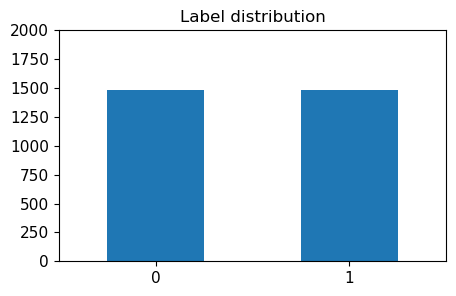

In [83]:
print(sentiment_sentence_df.label.value_counts())
# plot barchart for sentiment_sentence_df
sentiment_sentence_df.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, 2000],        
                                    rot = 0, fontsize = 11, figsize = (5,3))

1    534
0    466
Name: label, dtype: int64


<Axes: title={'center': 'Label distribution'}>

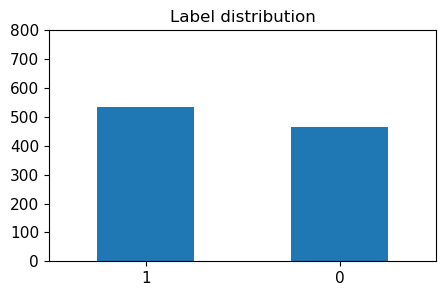

In [84]:
print(ssf_sample.label.value_counts())
# plot barchart for sentiment_sentence_df
ssf_sample.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, 800],        
                                    rot = 0, fontsize = 11, figsize = (5,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Label distribution'}>

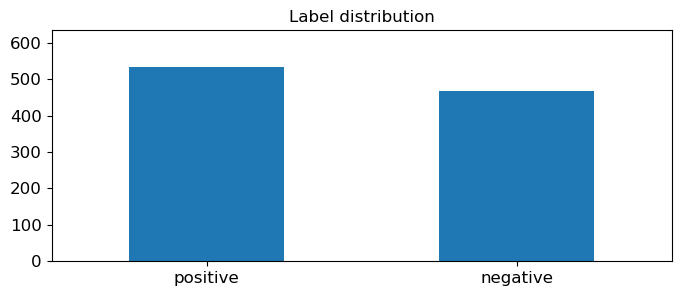

In [85]:
upper_bound = max(ssf_sample.label_category.value_counts())+100
ssf_sample.label_category.value_counts().plot(kind = 'bar',
                                           title = 'Label distribution',
                                           ylim = [0, upper_bound], rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

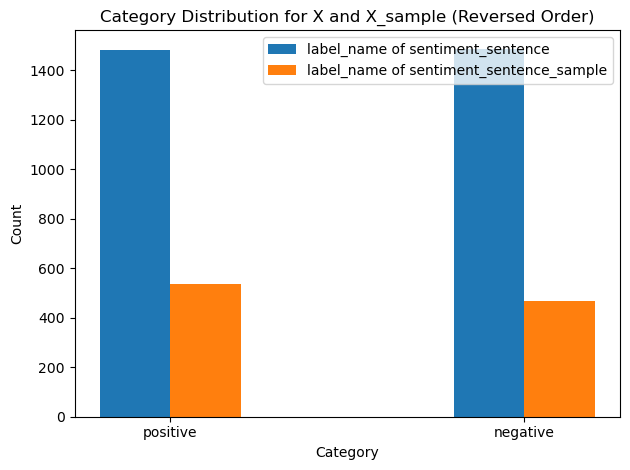

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Get the value counts for X_sample and X
counts_ssf_sample = ssf_sample.label_category.value_counts()
counts_sentiment_sentence_df = sentiment_sentence_df.label_category.value_counts()

# Find the unique categories from both datasets
unique_categories = sorted(set(counts_ssf_sample.index) | set(counts_ssf_sample.index))

# Reverse the order of unique_categories
unique_categories.reverse()

# Create an index for the unique categories
category_index = range(len(unique_categories))

# Create a bar width for the bars
bar_width = 0.2

# Shift the X positions for the two sets of bars
sentiment_sentence_df_positions = np.arange(len(unique_categories))
ssf_sample_positions = sentiment_sentence_df_positions + bar_width

# Plot the bars for X in red
plt.bar(sentiment_sentence_df_positions, counts_sentiment_sentence_df.reindex(unique_categories, fill_value=0),
        width=bar_width, label='label_name of sentiment_sentence', color='tab:blue')

# Plot the bars for X_sample in blue
plt.bar(ssf_sample_positions, counts_ssf_sample.reindex(unique_categories, fill_value=0), 
        width=bar_width, label='label_name of sentiment_sentence_sample', color='tab:orange')

# Set the x-axis ticks and labels with smaller font size, and rotate them to horizontal
plt.xticks([i + bar_width/2 for i in category_index], unique_categories, rotation=0, fontsize=10)

# Add a legend
plt.legend()

# Set the title and labels for the axes
plt.title('Category Distribution for X and X_sample (Reversed Order)')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the combined plot
plt.tight_layout()
plt.show()


### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.


In [87]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/al01545935/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
'''
LookupError: 
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
'''
# takes a like a minute or two to process
sentiment_sentence_df['unigrams'] = sentiment_sentence_df['review'].apply(lambda x: dmh.tokenize_text(x))

In [89]:
sentiment_sentence_df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [90]:
sentiment_sentence_df[0:4]

,website,review,label,label_category,text_length,unigrams
0,amazon,So there is no way for me to plug it in here i...,0,negative,82,"[So, there, is, no, way, for, me, to, plug, it..."
1,amazon,"Good case, Excellent value.",1,positive,27,"[Good, case, ,, Excellent, value, .]"
2,amazon,Great for the jawbone.,1,positive,22,"[Great, for, the, jawbone, .]"
3,amazon,Tied to charger for conversations lasting more...,0,negative,79,"[Tied, to, charger, for, conversations, lastin..."


In [91]:
list(sentiment_sentence_df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
sentiment_sentence_df_counts = count_vect.fit_transform(sentiment_sentence_df.review) #learn the vocabulary and return document-term matrix
print(sentiment_sentence_df_counts.shape)
print(sentiment_sentence_df_counts[0])

(2966, 5153)
  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [93]:
count_vect.get_feature_names_out()[696]

'care'

In [94]:
count_vect.get_feature_names_out()[3696]

'relying'

In [95]:
count_vect.get_feature_names_out()[4396]

'sum'

In [96]:
count_vect.get_feature_names_out()[1296]

'disappointing'

In [97]:
analyze = count_vect.build_analyzer()
analyze(sentiment_sentence_df.review[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [98]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [99]:
test = count_vect.build_analyzer()
print(test(sentiment_sentence_df['review'][0])[:30])

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']


In [100]:
analyze(" ".join(list(sentiment_sentence_df[:1].review)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [101]:
# We can check the shape of this matrix by:
sentiment_sentence_df_counts.shape

(2966, 5153)

In [102]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [103]:
# we convert from sparse array to normal array
sentiment_sentence_df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [104]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [105]:
for i in sentiment_sentence_df_counts[3:4, 0:100].nonzero():
    print(count_vect.get_feature_names_out()[i][0])

00
45


In [106]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [107]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(sentiment_sentence_df.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_19', 'doc_20']


In [108]:
plot_z = sentiment_sentence_df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


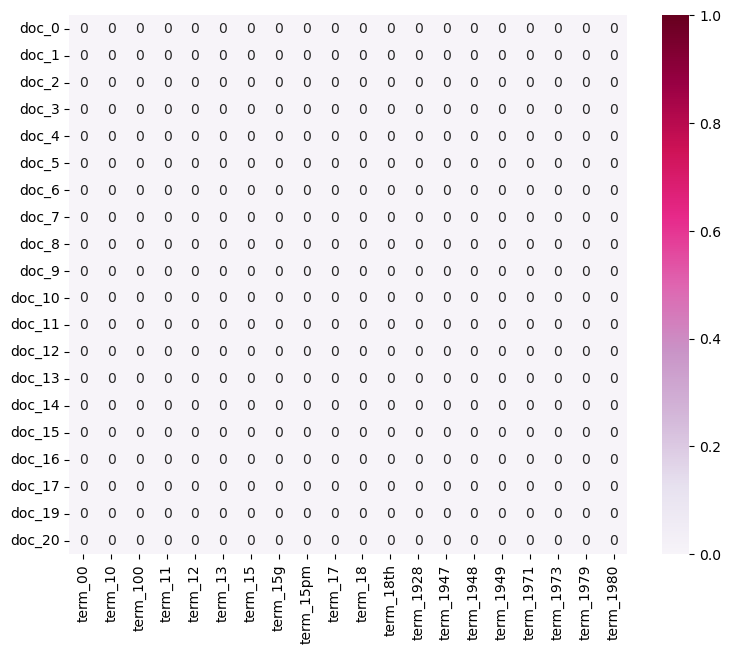

In [110]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

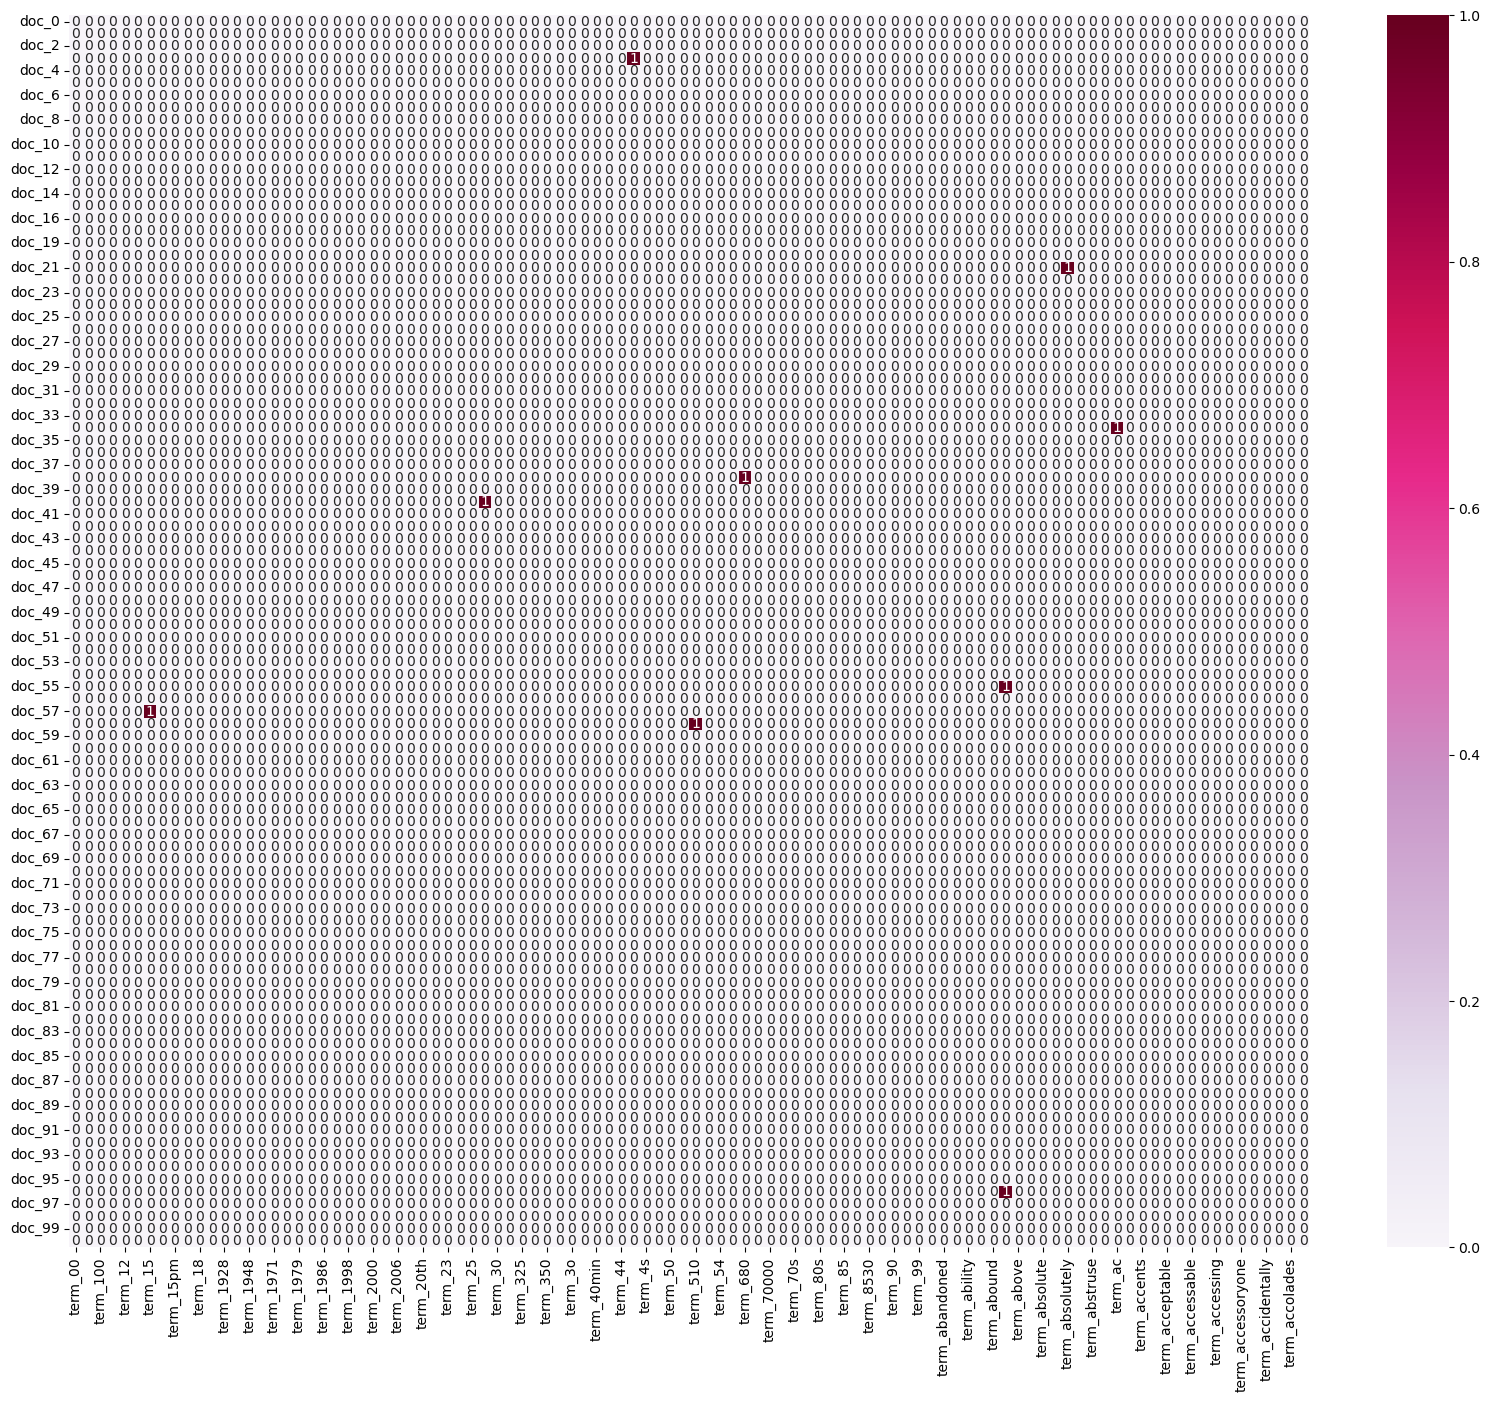

In [112]:
import seaborn as sns

sentiment_sentence_df_counts = sentiment_sentence_df_counts.astype('float32')

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:100]]
plot_y = ["doc_"+ str(i) for i in list(sentiment_sentence_df.index)[:100]]
plot_z = sentiment_sentence_df_counts[:100, :100].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y, dtype='float32')
plt.subplots(figsize=(20, 16))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

In [113]:
from sklearn.decomposition import PCA

In [114]:
print(sentiment_sentence_df_counts.shape)
sentiment_sentence_df_reduced = PCA(n_components = 2).fit_transform(sentiment_sentence_df_counts.toarray())
print(sentiment_sentence_df_reduced.shape)

(2966, 5153)
(2966, 2)


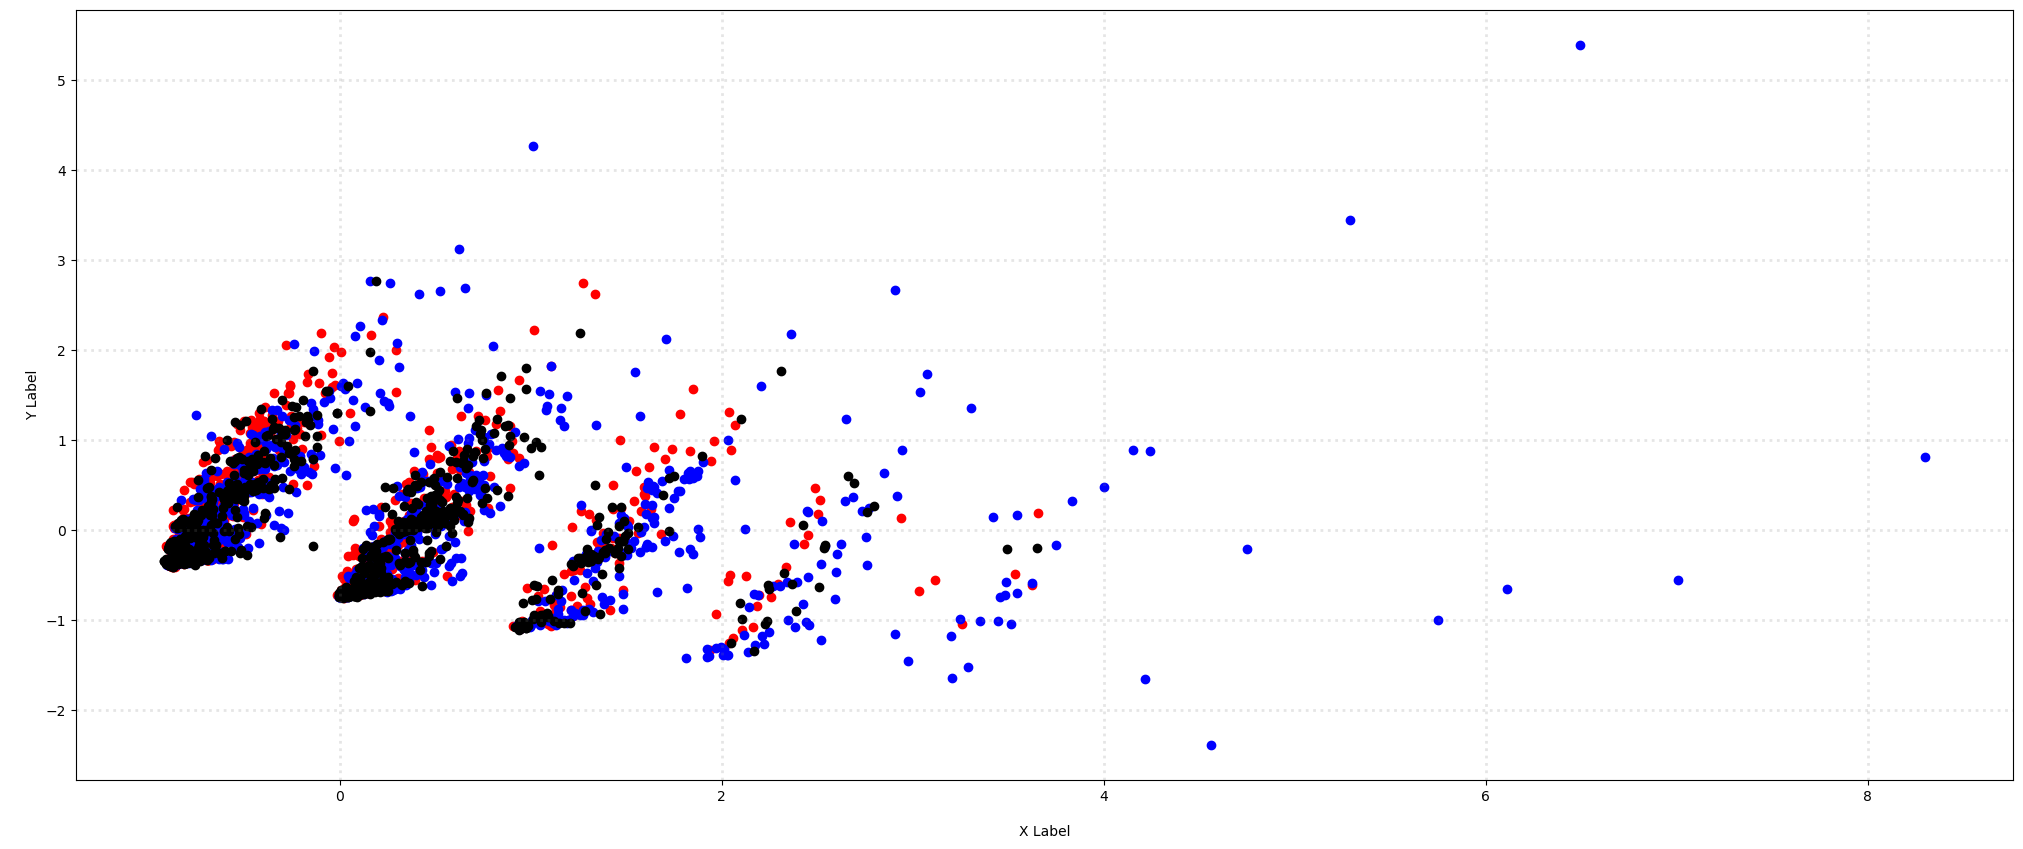

In [128]:
col = ['red', 'blue', 'black']
categories = ['amazon', 'imdb', 'yelp']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = sentiment_sentence_df_reduced[sentiment_sentence_df['website'] == category].T[0]
    ys = sentiment_sentence_df_reduced[sentiment_sentence_df['website'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

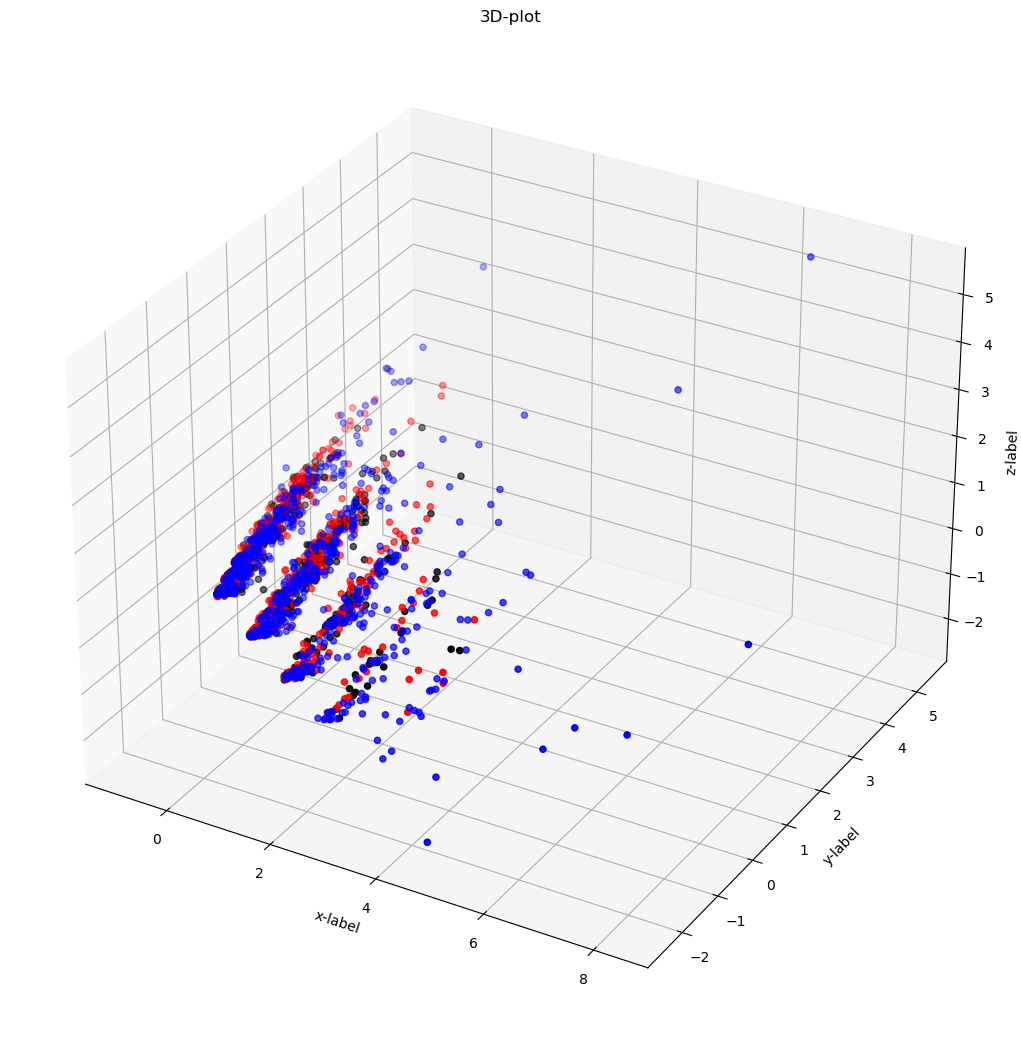

In [129]:
import numpy as np
import matplotlib.pyplot as plt

col = ['red', 'blue', 'black']
fig = plt.figure(figsize = (20, 13))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    x = sentiment_sentence_df_reduced[sentiment_sentence_df['website'] == category].T[0]
    y = sentiment_sentence_df_reduced[sentiment_sentence_df['website'] == category].T[1]
    z = sentiment_sentence_df_reduced[sentiment_sentence_df['website'] == category].T[1]
    ax.scatter(x, y, z, c = c, marker='o')

ax.set_xlabel('x-label')
ax.set_ylabel('y-label')
ax.set_zlabel('z-label')
# ax.plot(x, y, z)
plt.title('3D-plot')
plt.show()

### 5.5 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

In [120]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(sentiment_sentence_df_counts.shape[1])
for j in range(0,sentiment_sentence_df_counts.shape[1]):
    term_frequencies.append(sum(sentiment_sentence_df_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

5153


In [121]:
term_frequencies = np.asarray(sentiment_sentence_df_counts.sum(axis=0))[0]

In [124]:
term_frequencies[:150] #sum of first term

array([ 1., 34.,  3.,  2.,  4.,  3.,  3.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  9.,  1.,  2.,
        1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  7.,  1.,  1.,  3.,  1.,
        1.,  1.,  5.,  1.,  1.,  1.,  2.,  1.,  1.,  4.,  1.,  3.,  1.,
        1.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  7.,  1.,  1.,  1.,  1.,  1.,  5.,  4.,  1., 85.,  7.,  1.,
        1.,  1., 21.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,
        1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  3., 43.,
        7.,  1.,  1.,  1.,  1., 10., 19.,  3.,  3.,  1., 16.,  1.,  1.,
        2.,  1.,  1.,  2.,  3.,  4.,  2.,  1.,  1.,  1.,  1.,  1.,  6.,
        1.,  1.,  2.,  4.,  3.,  1.,  1.], dtype=float32)

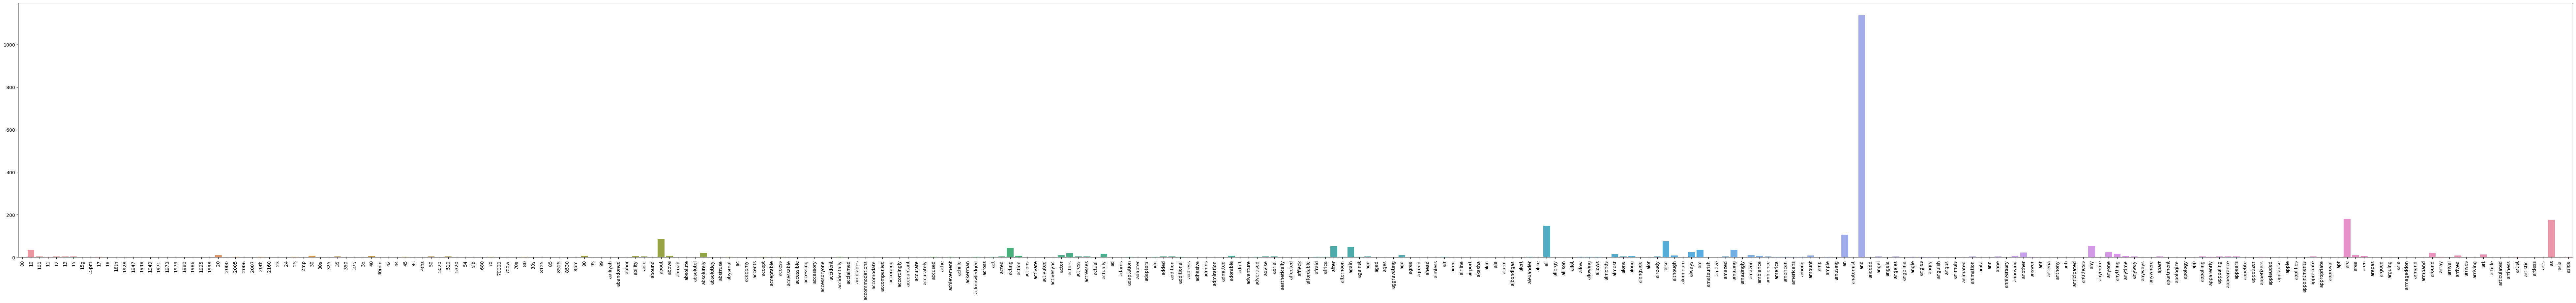

In [123]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [130]:
import pandas as pd
D = {}
D['terms'] = [i for i in count_vect.get_feature_names_out()[:200]]
D['frequencies'] = [i for i in term_frequencies[:200]]
D['color'] = [i for i in term_frequencies[:200]]
df = pd.DataFrame(D)

In [133]:
import plotly.express as px
# Create a DataFrame with the first 300 feature names and term frequencies
import pandas as pd
df = pd.DataFrame({'Feature Names': count_vect.get_feature_names_out()[:200],
                   'Term Frequencies': term_frequencies[:200]})

# Create an interactive bar plot using Plotly Express
fig = px.bar(df, x='Feature Names', y='Term Frequencies',
             title='Term Frequencies for the Top 300 Features',
             labels={'Feature Names': 'Feature Names', 'Term Frequencies': 'Term Frequencies'},
             hover_name='Feature Names')

# Customize the appearance (optional)
#fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for readability

# Show the interactive plot
#fig.show()

In [134]:
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [135]:
D2 = {}
D2['terms'] = [i for i in count_vect.get_feature_names_out()[:100]]
D2['frequencies'] = [i for i in term_frequencies[:100]]
D2['color'] = [i for i in term_frequencies[:100]]
df = pd.DataFrame(D2)

fig = px.bar(df, x = 'terms', y = 'frequencies', height=500, color = 'color')
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [136]:
temp = [(i, v) for i, v in zip(count_vect.get_feature_names_out()[:200], term_frequencies[:200])]
temp = sorted(temp, key=lambda x: x[1], reverse=True)

D2 = {}
D2['terms'] = [i[0] for i in temp[:]]
D2['frequencies'] = [i[1] for i in temp[:]]
D2['color'] = [i for i in temp[:]]

df2 = pd.DataFrame(D2)

fig = px.bar(df2, x = 'terms', y = 'frequencies', height=500, color = 'color')
fig.show()

In [137]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


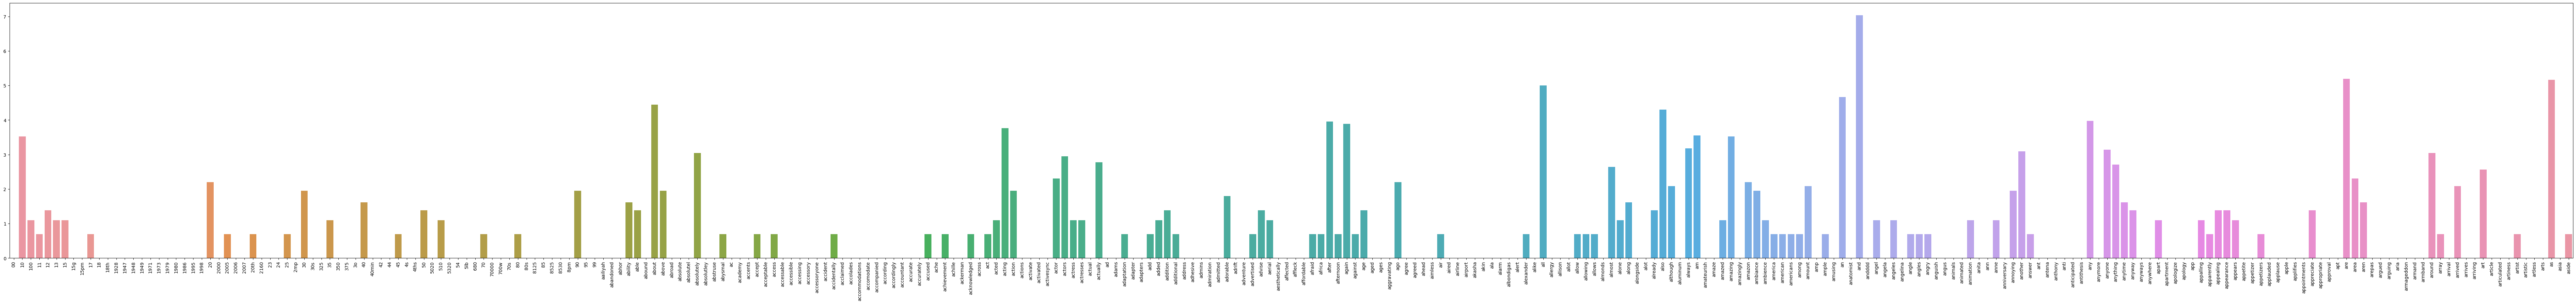

In [138]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [139]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [143]:
mlb = preprocessing.LabelBinarizer()

In [149]:
mlb.fit(sentiment_sentence_df.label)

LabelBinarizer()

In [150]:
sentiment_sentence_df['bin_category'] = mlb.transform(sentiment_sentence_df['label']).tolist()

In [151]:
sentiment_sentence_df[0:9]

,website,review,label,label_category,text_length,unigrams,bin_category
0,amazon,So there is no way for me to plug it in here i...,0,negative,82,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,amazon,"Good case, Excellent value.",1,positive,27,"[Good, case, ,, Excellent, value, .]",[1]
2,amazon,Great for the jawbone.,1,positive,22,"[Great, for, the, jawbone, .]",[1]
3,amazon,Tied to charger for conversations lasting more...,0,negative,79,"[Tied, to, charger, for, conversations, lastin...",[0]
4,amazon,The mic is great.,1,positive,17,"[The, mic, is, great, .]",[1]
5,amazon,I have to jiggle the plug to get it to line up...,0,negative,74,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,amazon,If you have several dozen or several hundred c...,0,negative,111,"[If, you, have, several, dozen, or, several, h...",[0]
7,amazon,If you are Razr owner...you must have this!,1,positive,43,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,amazon,"Needless to say, I wasted my money.",0,negative,35,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [152]:
mlb.fit(sentiment_sentence_df.label_category)


LabelBinarizer()

In [153]:
sentiment_sentence_df['Excercise 16'] = mlb.transform(sentiment_sentence_df['label_category']).tolist()
sentiment_sentence_df[0:9]

,website,review,label,label_category,text_length,unigrams,bin_category,Excercise 16
0,amazon,So there is no way for me to plug it in here i...,0,negative,82,"[So, there, is, no, way, for, me, to, plug, it...",[0],[0]
1,amazon,"Good case, Excellent value.",1,positive,27,"[Good, case, ,, Excellent, value, .]",[1],[1]
2,amazon,Great for the jawbone.,1,positive,22,"[Great, for, the, jawbone, .]",[1],[1]
3,amazon,Tied to charger for conversations lasting more...,0,negative,79,"[Tied, to, charger, for, conversations, lastin...",[0],[0]
4,amazon,The mic is great.,1,positive,17,"[The, mic, is, great, .]",[1],[1]
5,amazon,I have to jiggle the plug to get it to line up...,0,negative,74,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],[0]
6,amazon,If you have several dozen or several hundred c...,0,negative,111,"[If, you, have, several, dozen, or, several, h...",[0],[0]
7,amazon,If you are Razr owner...you must have this!,1,positive,43,"[If, you, are, Razr, owner, ..., you, must, ha...",[1],[1]
8,amazon,"Needless to say, I wasted my money.",0,negative,35,"[Needless, to, say, ,, I, wasted, my, money, .]",[0],[0]


## 6. Data Exploration

In [155]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = sentiment_sentence_df.iloc[50]
random_record_1 = random_record_1['review']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = sentiment_sentence_df.iloc[100]
random_record_2 = random_record_2['review']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = sentiment_sentence_df.iloc[150]
random_record_3 = random_record_3['review']
document_to_transform_3.append(random_record_3)

In [156]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [157]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [158]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0.

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3.

## . References

- Pandas cook book ([Recommended for starters](http://pandas.pydata.org/pandas-docs/stable/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)

# >>> **PART 3** 

## >>> **New Data Visualization:**
Use Bokeh, select former 200 words after CountVector() and show their numbers of occurance in sequence by there radius of each circle.

In [159]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [160]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook 
import numpy as np

x = np.arange(0, 200)
temp = list(0 for i in range(200))
y = np.array(temp)
temp = list(i for i in term_frequencies[:200])
radii = np.array(temp)

In [161]:
output_notebook()

Loading BokehJS ...

In [162]:
p = figure(x_range=(0, 200), y_range=(0, 200), height=500, width=800)
p.circle(x, y, radius = radii, fill_alpha = 0.1, fill_color='purple', line_color='purple')
show(p)

Use plotly, select former 50 words after CountVector() and show their weight by pie chart

In [163]:
import plotly.express as px

temp = [(i, v) for i, v in zip(count_vect.get_feature_names_out()[:30], term_frequencies[:30])]
temp = sorted(temp, key=lambda x: x[1], reverse=True)

df = {'term': [ i[0] for i in temp[:]], 'frequency': [i[1] for i in temp[:]]}
p = px.pie(df, values='frequency', names='term', title='Top 100 Terms\' Frequency',  color_discrete_sequence=px.colors.sequential.RdBu)
p.show()

## >>> **TF-IDF features:**

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [168]:
vectorizer = TfidfVectorizer()
TF_idf = vectorizer.fit_transform(sentiment_sentence_df['review'])
print(TF_idf[0])

  (0, 1012)	0.3986168387492481
  (0, 646)	0.22333547273087015
  (0, 1981)	0.23146985374950851
  (0, 4791)	0.3320558096799929
  (0, 4833)	0.27546430092514007
  (0, 4529)	0.08650236048704857
  (0, 2157)	0.2227159333830498
  (0, 2313)	0.2951617172401695
  (0, 2431)	0.11953102323931236
  (0, 3385)	0.30874481545976773
  (0, 4607)	0.12738906128503263
  (0, 2808)	0.22860251631494138
  (0, 1828)	0.15661880776106893
  (0, 4985)	0.24912565648943613
  (0, 3042)	0.22333547273087015
  (0, 2426)	0.12069328594000049
  (0, 4543)	0.2075378632582399
  (0, 4159)	0.1873278991359609


## >>> **Naive Bayes classifier:**

In [169]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [170]:
term_frequencies = []
for j in range(0,sentiment_sentence_df_counts.shape[1]):
    term_frequencies.append(sum(sentiment_sentence_df_counts[:,j].toarray()))

### >> 1. Use TF-IDF features

In [171]:
X1 = TF_idf
y = sentiment_sentence_df['website']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=0)
model = MultinomialNB()
model.fit(X1_train,y1_train)
model.predict(X1_test)
model.predict_proba(X1_test)
model.score(X1_test,y1_test)

0.8595505617977528

### >> 2. Use the word frequency features

In [173]:
X2 = sentiment_sentence_df_counts
y = sentiment_sentence_df['website']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=0)
model = MultinomialNB()
model.fit(X2_train,y2_train)
model.predict(X2_test)
model.predict_proba(X2_test)
model.score(X2_test,y2_test)

0.8651685393258427

Comments: According to the results above, we can observe that using TF-IDF features as training data has a higher score of accuracy on the given test data and labels caompared to that of word frequency features. I think the reason is that the denominator of TF-IDF is (total documants number/ number of documents contain the term), which takes the whole dataset into consideration and thus being more accurate than only consider each term's frequency.

# >>> **PART 4** 

## Inefficent parts & How to improve:
### Some memory saving are a bit tricky and cost a large amount of memory space. So we can change data types(such as using np.int8, np.uint8...).
### If we don't want to process data each time after reopening and running the code, we can wright our updated data into an csv file, thus next time we just have to read that excel and start from it without wasting time.
### Since we already have known what's our data look like, we can transform our data into optimizing dtypes.
### We can creates an iterator object and split data into chunks
